# Step 1: Libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Step 2: Load necessary data

In [47]:
conn = sqlite3.connect('classic.db')
order_details = pd.read_sql_query("SELECT * FROM orderdetails", conn)
products = pd.read_sql_query("SELECT * FROM products", conn)
conn.close()

# Step 3: Data Preparation

In [48]:
np.random.seed(42)
num_products = 10
num_samples = 100

In [49]:
data = {
    'productCode': np.random.choice([f'Product_{i}' for i in range(num_products)], num_samples),
    'price': np.random.uniform(10, 100, num_samples),
    'quantityOrdered': np.random.randint(1, 50, num_samples)
}
sales_data = pd.DataFrame(data)

# Step 4: Aggregation

In [50]:
sales_performance = sales_data.groupby('productCode').agg({
    'quantityOrdered': 'sum',
    'price': 'mean'
}).reset_index()

# Step 5: Feature Preparation, Model Training and Implementation

In [51]:
optimal_prices = []

In [70]:
for product in sales_performance['productCode']:
    product_data = sales_data[sales_data['productCode'] == product]

    # Prepare features and target variable
    x = product_data[['price']]
    y = product_data['quantityOrdered']

    # Split into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Train Decision Tree Model
    decision_tree_model = DecisionTreeRegressor()
    decision_tree_model.fit(x_train, y_train)

    # Generate a range of prices from 10 to 100 for prediction
    price_range = np.linspace(10, 100, 100).reshape(-1, 1)
    predicted_quantities = decision_tree_model.predict(price_range)

    # Find the optimal price for this product
    optimal_price_index = np.argmax(predicted_quantities)
    optimal_price = price_range[optimal_price_index][0]
    optimal_quantity = predicted_quantities[optimal_price_index]

    # Store the optimal price and quantity
    optimal_prices.append({
        'productCode': product,
        'Optimal Price': optimal_price,
        'Optimal Quantity Ordered': optimal_quantity
    })


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

In [71]:
optimal_prices_df = pd.DataFrame(optimal_prices)

# Step 6: Visualization

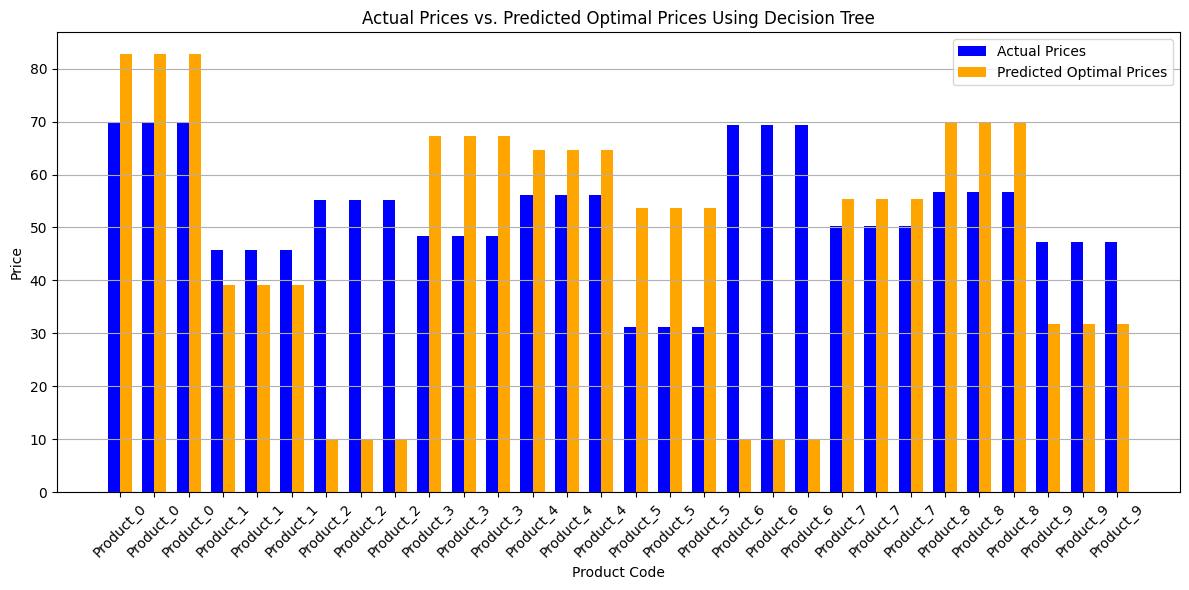

In [72]:
comparison_df = sales_performance.merge(optimal_prices_df, on='productCode')

# Create a bar chart
plt.figure(figsize=(12, 6))

# Set the bar width
bar_width = 0.35
index = np.arange(len(comparison_df))

# Plot actual prices
plt.bar(index, comparison_df['price'], bar_width, label='Actual Prices', color='blue')

# Plot predicted optimal prices
plt.bar(index + bar_width, comparison_df['Optimal Price'], bar_width, label='Predicted Optimal Prices', color='orange')

# Adding labels and title
plt.xlabel('Product Code')
plt.ylabel('Price')
plt.title('Actual Prices vs. Predicted Optimal Prices Using Decision Tree')
plt.xticks(index + bar_width / 2, comparison_df['productCode'], rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()